In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.models import Word2Vec

In [3]:
df = pd.read_csv('../data/reddit_munged.csv')

In [4]:
df.head()

,title,subreddit,selftext,created_utc
0,Help a knight out pls?!,darksouls,Hey can you guys help me out?? What are the be...,1630950347
1,Fire weapons?,darksouls,Yeah how do i get a weapon with fire dmg or ot...,1630949405
2,Iron Golem lore,darksouls,Has anyone found any mentions of the iron gole...,1630949186
3,I got cursed and have no idea what to do?,darksouls,"I recently just defeated the capra demon, went...",1630948149
4,DS platinum trophy,darksouls,Recently platinumed Dark Souls. Kinda wanted t...,1630948149


In [5]:
df.isnull().sum() # just checking

title          0
subreddit      0
selftext       0
created_utc    0
dtype: int64

In [6]:
cv = CountVectorizer(stop_words = 'english', min_df = 100, max_df = 400 )

I want to make sure we have a roughly even number of each type of subreddit

In [7]:
df['subreddit'].value_counts()

sekiro       10400
darksouls    10000
Name: subreddit, dtype: int64

In [8]:
X, y = df['title'], df['subreddit'].map({'darksouls': 1, 'sekiro': 0})
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

X_train_fit = cv.fit_transform(X_train)


In [9]:
X_train_df = pd.DataFrame(X_train_fit.todense(), columns=cv.get_feature_names())
X_test_fit = cv.transform(X_test)
X_test_df = pd.DataFrame(X_test_fit.todense(), columns=cv.get_feature_names())

In [10]:
counts = X_train_fit.sum(axis=0)
word_counts = pd.DataFrame(counts, columns=cv.get_feature_names()).T
word_counts.columns =['occurences']

In [11]:
word_counts.sort_values(by = 'occurences', ascending = False).head(10)

,occurences
sword,517
does,436
good,400
second,378
butterfly,372
better,366
try,362
parry,361
soul,322
finally,316


In [12]:
from sklearn.linear_model import LogisticRegression


In [13]:
lr = LogisticRegression()
lr.fit(X_train_df, y_train)

LogisticRegression()

In [14]:
lr.score(X_train_df, y_train),lr.score(X_test_df, y_test)

(0.9606535947712418, 0.9596078431372549)

In [15]:
 test = """In 17th century Japan following the Sengoku period, warlord Isshin Ashina staged a coup and seized control of the land of Ashina.[1] During this time, a nameless orphan is adopted by the wandering shinobi named Ukonzaemon Usui, known to many as "Owl", who named the boy "Wolf" and trained him in the ways of the shinobi. Two decades later, Ashina is on the brink of collapse due to the now elderly Isshin falling ill and the Interior Ministry, a group set on unifying Japan, steadily closing in. Desperate to save his clan, Isshin's adoptive grandson Genichiro seeks the immortal "Divine Heir" Kuro in hopes of using "Dragon Heritage" in his blood to create an immortal army. Wolf, now a full-fledged shinobi and Kuro's personal bodyguard, fights him but loses the duel along with his left arm while Genichiro takes the boy.

Having received Kuro's blood, Wolf survives and is brought to an abandoned temple to recuperate by a Sculptor, a former shinobi known as Sekijo, who now carves Buddha statues. Armed with a Shinobi Prosthetic,[3][8][9] Wolf assaults Ashina Castle and confronts Genichiro again, defeating him. However, Genichiro survives as he drank the "Rejuvenating Waters", an artificial replication of the Dragon Heritage. As Wolf rescues Kuro, the two are given the opportunity to flee Ashina forever. However, Kuro instead decides to stay and perform the "Immortal Severance" ritual, which would remove his Dragon Heritage and prevent anybody else from fighting over him to obtain immortality. Wolf reluctantly agrees to help and sets out to collect the necessary materials for the ritual, including a special sword that can kill immortals known as the Mortal Blade, which is safeguarded by the immortal "Child of the Rejuvenating Waters", the only survivor from an experiment with the Rejuvenating Waters. Wolf crosses paths with Isshin Ashina during his quest, who gives him a new name: "Sekiro", the "one-armed wolf".

After collecting all the components for the ritual, Sekiro is confronted by Owl, who was thought dead years prior. Owl reveals he also seeks the Dragon Heritage and orders Sekiro to renounce his loyalty to Kuro. If Sekiro sides with Owl, he is forced to fight Isshin's doctor, Emma, and Isshin himself. Upon defeating them, Sekiro proceeds to betray Owl while Kuro realizes he has been corrupted by bloodlust, resulting in the "Shura" ending. If Kuro is chosen, Sekiro fights and kills Owl. He then uses the gathered items to enter the Divine Realm to collect the final component: the Divine Dragon's tears. Upon returning to Ashina, Sekiro discovers Isshin has succumbed to his illness and that the castle is under attack by the Interior Ministry. Being informed by Emma that Kuro has fled, Sekiro finds him under attack by Genichiro, wielding a second Mortal Blade. Genichiro then challenges Sekiro one last time, only to be defeated once again. Realizing Ashina is lost, Genichiro sacrifices himself by using the Mortal Blade to revive Isshin in his prime so he might restore the clan. Although he disagrees with Genichiro's methods, Isshin honours his grandson's wish and fights Sekiro.

After defeating Isshin, there are three possible endings. Giving Kuro the Dragon Tears results in the standard ending, "Immortal Severance," where the Dragon Heritage is removed at the cost of Kuro's life. Afterwards, Sekiro takes the Sculptor's place at the abandoned temple and ends his life as a shinobi. Working with Emma to find a way to complete the ritual without Kuro having to die will result in the "Purification" ending, where Sekiro manages to save Kuro at the cost of his own life. The final ending, "Dragon's Homecoming", is obtained by helping the Divine Child of the Rejuvenating Waters. Kuro's body dies, but his spirit lives on inside the Divine Child. Afterwards, Sekiro chooses to follow the Divine Child on a journey to return the Dragon Heritage to its birthplace.

The story also features a series of gameplay segments taking place three years before the main plot, explaining the events leading to Sekiro receiving the dragon's heritage. During the year of the dragon spring pilgrimage, the Hirata estate, the home of one of the Ashina's cadet branches and Kuro's birthplace, was raided by bandits. While making his way to Kuro, Sekiro discovers that the raid was orchestrated by a shinobi who trained him in the past, Lady Butterfly, who tried to kidnap Kuro. After defeating Lady Butterfly, Sekiro is stabbed in the back by an unseen assailant, later revealed to be Owl, who orchestrated the whole raid, but survives thanks to Kuro gifting him with the dragon's heritage.
"""


In [16]:
test_cv = cv.transform([test])

In [17]:
test_df =  pd.DataFrame(test_cv.todense(), columns=cv.get_feature_names())


In [18]:
lr.predict(test_df)

array([0])

In [19]:
import pickle

In [20]:
with open('../pickels/model1.pkl', mode ='wb') as pickle_out:
    pickle.dump(lr, pickle_out)
    
with open('../pickels/test.pkl', mode ='wb') as pickle_out:
    temp = X_test_df.join(y_test)
    pickle.dump(X_test_df, pickle_out)
with open('../pickels/train.pkl', mode ='wb') as pickle_out:
    temp = X_train_df.join(y_train)
    pickle.dump(temp, pickle_out)
with open('../pickels/dataformated.pkl', mode ='wb') as pickle_out:
    temp = pd.concat([X_train_df.join(y_train), X_test_df.join(y_test)])
    pickle.dump(temp, pickle_out)

In [21]:
temp.head()

,2nd,5600xt,able,advice,advise,amp,appearance,armor,armored,ash,...,warrior,waters,weapon,weapons,white,won,work,world,worth,subreddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [22]:
coefs = pd.DataFrame(lr.coef_, columns=X_train_df.columns).T
coefs.columns = ['Coef']
coefs.sort_values('Coef', ascending = False).head(10)

,Coef
smough,5.525604
quick,4.409929
depths,3.322535
ds,3.289306
weapons,3.279091
blighttown,3.219927
ds1,3.074953
build,3.051071
killed,2.923094
armor,2.852155


In [23]:
coefs.sort_values('Coef', ascending = False).tail(10)

,Coef
warmup,-4.477116
headless,-4.672979
love,-4.678711
5600xt,-4.695682
advise,-4.695682
vs,-4.743654
grinding,-4.770720
advice,-4.868249
demake,-5.264791
worth,-5.720662


In [24]:
with open('../pickels/logregmodel_coefs.pkl', mode ='wb') as pickle_out:
    pickle.dump(coefs, pickle_out)

In [28]:
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

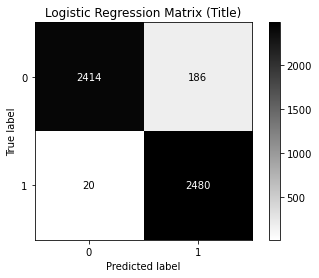

In [30]:
plot_confusion_matrix(lr, X_test_df, y_test, cmap = 'gray_r');
plt.title('Logistic Regression Matrix (Title)');
plt.savefig('../output/logreg-title-matrix.png')